### We'll be Counting Stars
    For the clustering portion of this project, I need to get labels (sunspot counts) from ~50 images 
    These sunspot counts are k, number of clusters, which will be compared with clustering algorithms. 
                            Human Counting vs. HDBSCAN vs. DPGMM

#### Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from astropy.io import fits
import astropy.convolution
from astropy.convolution import convolve_fft, convolve
%matplotlib inline

#### Import User Defined Functions

In [2]:
def get_image_file_name_path(path):
    filelist = []
    for i, filename in enumerate(os.listdir(path)):
        # exclude the error log file
        if "ds_store" not in filename.lower():
            filelist.append(filename)
    return filelist

In [3]:
def get_image(image_dir, image_path):
    '''returns image data matrix'''
    hdulist = fits.open(image_dir + image_path)
    hdu = hdulist[0]
    df = pd.DataFrame(hdu.data)
    df.fillna(value=0,inplace=True)
    clean_data = df.values
    return clean_data

#### Get Image Filenames

In [4]:
image_path = "/Users/Alexander/NASA/NASA_Sample_Data/Images/"
file_name_list = get_image_file_name_path(image_path)

#### Get Diverse Sub-Sample 

In [5]:
# sample images that are sufficiently differnt from each other
test_index = np.arange(0, 415, 8) # used for diverse image sub-smaple
test_files = [ file_name_list[index] for index in test_index]

In [6]:
print "{} test files ".format(len(test_files))
test_files[0:3]

52 test files 


['fd_M_96m_01d.3925.0000.fits',
 'fd_M_96m_01d.3926.0005.fits',
 'fd_M_96m_01d.3926.0014.fits']

### Label Images one-at-time

In [24]:
image_index = 1

In [26]:
print test_files[image_index]
ith_image = get_image(image_path, test_files[image_index])

fd_M_96m_01d.3926.0005.fits


In [27]:
data_abs_diff = np.abs(ith_image)

In [28]:
k = 10 # for MDI images 
gauss = astropy.convolution.Gaussian2DKernel(stddev=k)

In [29]:
smoothing = convolve_fft(data_abs_diff, gauss)

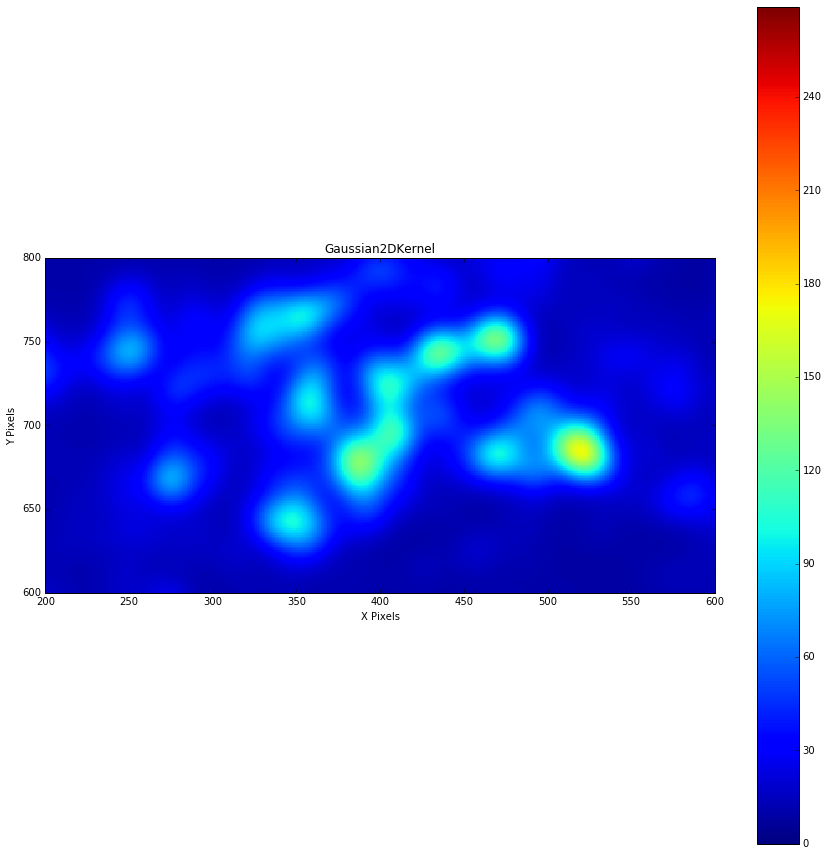

In [47]:
plt.figure(figsize = (15,15));
a1 = np.ma.masked_where(smoothing <= 130, smoothing)
plt.imshow(smoothing, interpolation='none', origin='lower');
plt.title("Gaussian2DKernel")
plt.xlabel("X Pixels")
plt.ylabel("Y Pixels")
plt.ylim((600,800))
plt.xlim((200,600))
plt.colorbar()
plt.show()

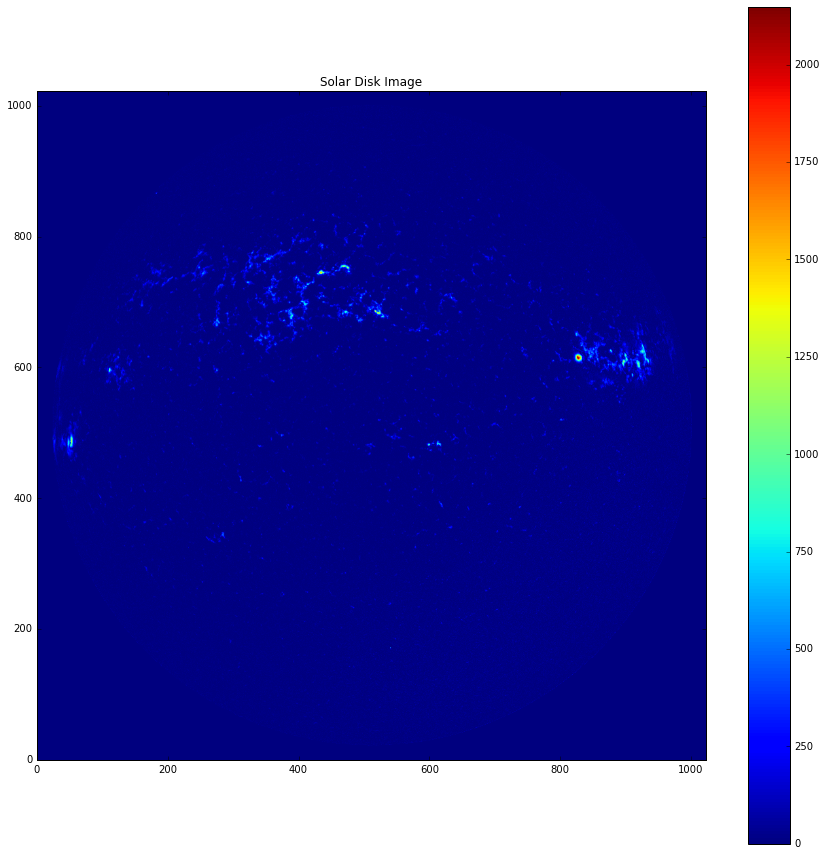

In [35]:
plt.figure(figsize = (15,15));
a1 = np.ma.masked_where(data_abs_diff <= 130, data_abs_diff)
plt.imshow(data_abs_diff, origin='lower');
plt.title("Solar Disk Image")
# plt.xlim((400,700))
#plt.ylim((400,700))
plt.colorbar()

plt.show()

In [ ]:
# file_index, file_name , num_clusters
# 0         , fd_M_96m_01d.3925.0000.fits, 2
# 1         , fd_M_96m_01d.3926.0005.fits, 